In [10]:
import tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_dir="../Dataset/caltech-101-img/"

dataset_gen=ImageDataGenerator(
    rescale=1.0/255,
)

dataset_generator=dataset_gen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=2000,
    class_mode="categorical"
)

Found 9144 images belonging to 102 classes.


In [3]:
(xtrain,ytrain)=dataset_generator[0]
(xtest,ytest)=dataset_generator[1]

print(len(xtrain))
print(len(xtest))

2000
2000


In [5]:
weigth_path="../Dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model=VGG16(weights=weigth_path,input_shape=(64,64,3),include_top=False)

In [6]:
for layer in base_model.layers:
    layer.trainable=False

In [8]:
x=Flatten()(base_model.output)
x=Dense(64,activation="relu")(x)
prediction=Dense(102,activation="softmax")(x)

model=Model(inputs=base_model.input,outputs=prediction)
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
model.fit(xtrain,ytrain,epochs=2,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/2
32/32 [==============================] - 84s 3s/step - loss: 4.0405 - accuracy: 0.1675 - val_loss: 3.5167 - val_accuracy: 0.2665
Epoch 2/2
32/32 [==============================] - 83s 3s/step - loss: 3.1064 - accuracy: 0.3370 - val_loss: 3.0694 - val_accuracy: 0.3630


In [11]:
base_model=VGG16(weights=weigth_path,include_top=False,input_shape=(64,64,3))

for layer in base_model.layers:
    layer.trainable=False

for layer in base_model.layers[len(base_model.layers)-2:]:
    layer.trainable=True

x=Flatten()(base_model.output)
x=Dense(512,activation="relu")(x)
x=tensorflow.keras.layers.Dropout(0.3)(x)
prediction=Dense(102,activation="softmax")(x)

model=Model(inputs=base_model.input,outputs=prediction)

model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=2,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/2
32/32 [==============================] - 89s 3s/step - loss: 3.1936 - accuracy: 0.3390 - val_loss: 2.4109 - val_accuracy: 0.4835
Epoch 2/2
32/32 [==============================] - 88s 3s/step - loss: 1.8576 - accuracy: 0.5620 - val_loss: 2.0101 - val_accuracy: 0.5400


In [13]:
predicted=model.predict(xtest)

63/63 [==============================] - 41s 655ms/step
Actual =  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Predicted=  0


In [17]:
label=list(dataset_generator.class_indices.keys())

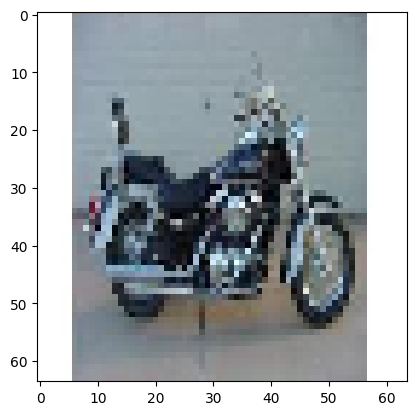

Actual =  Motorbikes
Predicted=  Motorbikes


In [37]:
import random 
n=random.randint(0,2000)
plt.imshow(xtest[n])
plt.show()
print("Actual = ", label[np.argmax(ytest[n])])
print("Predicted= ",label[np.argmax(predicted[n])])

In [50]:
tensorflow.keras.optimizers.Adam?

Init signature:
tensorflow.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    **kwargs,
)
Docstring:     
Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.

According to
[Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
the method is "*computationally
efficient, has little memory requirement, invariant to diagonal rescaling of
gradients, and is well suited for problems that are large in terms of
data/parameters*".

Args:
    learning_rate: A `tf.Tensor`, floating point value, a schedule that is a
        `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
        